In [1]:
#importamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

#cambiamos la carpeta de trabajo y cargamos los archivos
data_folder = r'D:\Datos G. omarorum\SD' #cambiar a ruta con archivos .bin
os.chdir(data_folder)

means_files = sorted(glob.glob('*.txt'))

In [12]:
means_all_fish = pd.DataFrame(np.zeros(shape=(26,len(means_files))), columns=['P' + str(i) for i in range(1, len(means_files)+1)])
for i,fish in enumerate(means_files):
    means = np.loadtxt(fish, dtype=float)
    means_all_fish.iloc[:25, i] = means[:25, 1]
    means_all_fish.iloc[25, i]  = np.nanmean(means[25:,1])

means_all_fish   

,P1,P2,P3,P4,P5,P6
0,0.075415,NaN,0.002795,0.053791,NaN,NaN
1,0.061234,0.000356,0.007806,0.021509,NaN,NaN
2,0.020209,0.001786,0.003818,0.018508,0.000650,NaN
3,0.012041,0.000889,0.001893,0.021886,0.001817,0.000447
4,0.015732,0.002037,0.001006,0.018237,0.000937,0.168647
5,0.008353,0.001674,0.002362,0.042063,0.003002,0.015643
6,0.013135,0.002207,0.001702,0.033306,0.002234,0.052034
7,0.007136,0.002207,0.002936,0.034856,0.002926,0.003145
8,0.011639,0.003525,0.001987,0.029033,0.003873,0.001882
9,0.013289,0.001806,0.004017,0.030995,0.003190,0.094766


In [17]:
means_all_fish['P5'].iloc[-1] = 0

In [22]:
means_all_fish.reset_index(inplace=True)

In [52]:
means_all_fish['index'] = means_all_fish['index']+1

C:\Users\Compras\AppData\Local\Temp\ipykernel_15256\1807678483.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  line = sns.lineplot(data=means_all_fish.melt(id_vars='index'),


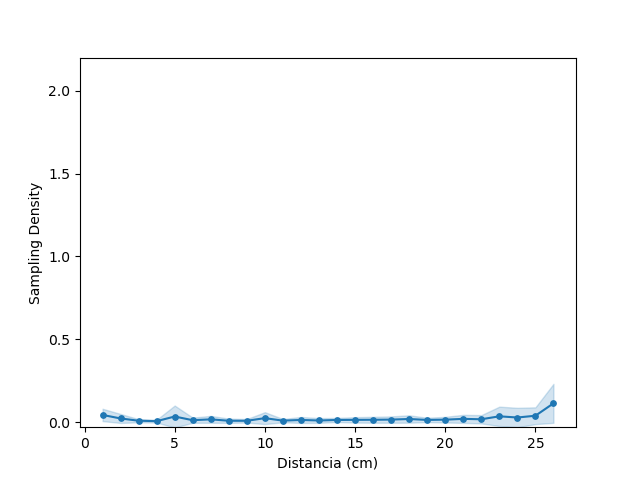

In [64]:
%matplotlib widget
import seaborn as sns
fig, ax = plt.subplots()
line = sns.lineplot(data=means_all_fish.melt(id_vars='index'),
             x='index', 
             y='value',
             ax=ax, ci='sd')
ax.scatter(means_all_fish['index'], means_all_fish.iloc[:,1:].mean(axis=1), s = 15)
ax.set(ylim=[-0.03,2.2], yticks=[0,0.5,1,1.5,2], ylabel='Sampling Density', xlabel='Distancia (cm)')
plt.show()
fig.savefig('mean_SD_all_fish.svg', format='svg')